In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def f(x):
    y = x[0]**2 + x[1]**2
    return y
def h(x):
    y = (x[0]+2)**2 + (x[1]+4)**2 + (x[0]-3)**2 + (x[0]-2)**2
    return y
def normal2D(x):
    y = np.exp(-(x[0]**2 + x[1]**2)/2)
    return y
def normals(x):
    y = -np.exp(-(x[0]**2 + x[1]**2)/2) - np.exp(-((x[0]-3)**2 + (x[1]-3)**2)/2)
    return y
def nonconvex(x):
    y = x[0] * x[1]
    return y
def g(x):
    y = x[0]**2 + x[1]**2 + x[2]**2
    return y
def weird(x):
    y = 10*x[0]**2 + np.sin(x[1])**2
    return y

In [26]:
x = np.array([5.0,3.0])
y = np.array([2.0,3.0,4.0])
def derivative(f, x, var, epsilon):
    y = np.copy(x)
    y[var] += epsilon
    return ((f(y) - f(x))/epsilon)

In [27]:
def gradient(f,x,epsilon):
    grad = np.array([0.]*len(x))
    for i in range(len(x)):
        grad[i] = derivative(f, x, i, epsilon)
    return grad

In [ ]:
def gradientDescent2(f, gradf, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)
    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x1,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradf(x1)
        x0 = np.copy(x1)
        x1 = np.copy(x0) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
    return(hist)

In [129]:
def gradientDescent(f, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)
    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradient(f, x1, step/10)
        x0 = np.copy(x1)
        x1 = np.copy(x1) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
    return(hist)

In [131]:
derivative(f,x,1,0.01)
gradient(f,x,0.2)
gradientDescent(f, x, 0.01, 0.01, 100)

array([[  4.        ,   1.        ,  17.        ],
       [  3.91999   ,   0.97999   ,  16.326702  ],
       [  3.8415802 ,   0.9603802 ,  15.68006856],
       [  3.7647386 ,   0.9411626 ,  15.05904373],
       [  3.68943382,   0.92232934,  14.46261336],
       [  3.61563515,   0.90387276,  13.88980348],
       [  3.54331244,   0.8857853 ,  13.33967868],
       [  3.4724362 ,   0.8680596 ,  12.8113406 ],
       [  3.40297747,   0.8506884 ,  12.30392643],
       [  3.33490792,   0.83366464,  11.81660758],
       [  3.26819976,   0.81698134,  11.34858821],
       [  3.20282577,   0.80063172,  10.89910405],
       [  3.13875925,   0.78460908,  10.46742106],
       [  3.07597407,   0.7689069 ,  10.05283429],
       [  3.01444459,   0.75351876,   9.65466669],
       [  2.9541457 ,   0.73843839,   9.27226804],
       [  2.89505278,   0.72365962,   8.90501385],
       [  2.83714173,   0.70917643,   8.55230438],
       [  2.78038889,   0.6949829 ,   8.21356361],
       [  2.72477111,   0.68107

In [132]:
def computeZ(f, m, M):
    nb = 20
    rangeX = np.linspace(m, M, nb)
    rangeY = np.linspace(m, M, nb)
    Z = np.array([[0.]*len(rangeX)]*len(rangeY))
    for x in range(len(rangeX)):
        for y in range(len(rangeY)):
            a = [rangeX[x],rangeY[y]]
            Z[x,y] = f(a)
    return (rangeX,rangeY,Z)

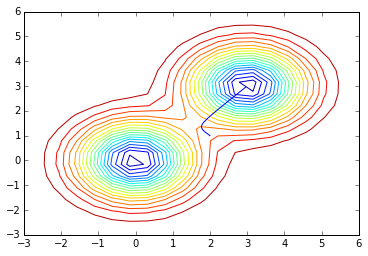

In [160]:
x = np.array([2.,1.])
GD = gradientDescent(normals,x,0.2,0.001,1000)
plt.plot(GD[:,0],GD[:,1])
X,Y,Z = computeZ(normals,-3.,6.)
plt.contour(X,Y,Z,np.linspace(-1,0,20))
plt.show()

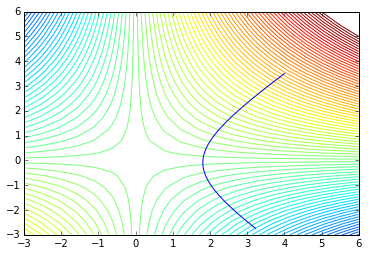

In [154]:
x = np.array([4.,3.5])
GD = gradientDescent(nonconvex,x,0.1,0.001, 25)
plt.plot(GD[:,0],GD[:,1])
X,Y,Z = computeZ(nonconvex,-3.,6.)
plt.contour(X,Y,Z, np.linspace(-30,30,100))
plt.legend()
plt.show()